#1. Google Play Store apps and reviews


We have two files of data:

"apps.csv": It has details about apps on Google Play, described by 13 features.
"user_reviews.csv": It contains 100 reviews for each app, sorted by helpfulness. Each review has new features: Sentiment (Positive, Negative, or Neutral), Sentiment Polarity, and Sentiment Subjectivity.



In [ ]:
import pandas as pd


In [ ]:
apps_with_duplicates = pd.read_csv('/content/apps.csv')
#apps_with_duplicates.head()
#apps_with_duplicates.info()
#apps_with_duplicates.shape
num_of_duplicates = apps_with_duplicates.duplicated(subset=None, keep='first').sum()
print("Number of duplicate rows is", num_of_duplicates)

Number of duplicate rows is 0


In [ ]:
apps = apps_with_duplicates.drop_duplicates()
#num of apps
print('Total number of apps in the dataset = ', len(apps))



Total number of apps in the dataset =  9659


In [ ]:
# Have a look at a random sample of 5 rows
apps.sample(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9154,10325,FE Mobile,BUSINESS,3.0,2,8.0M,10+,Free,0,Everyone,Business,"July 10, 2018",1.4.5,4.1 and up
2314,2965,Onefootball - Soccer Scores,SPORTS,4.7,911995,20M,"10,000,000+",Free,0,Everyone,Sports,"August 1, 2018",10.8.1.330,4.4 and up
862,1073,Wells Fargo Mobile,FINANCE,4.4,250706,37M,"10,000,000+",Free,0,Everyone,Finance,"July 31, 2018",6.8.0.109,5.0 and up
2238,2856,Flickr,PHOTOGRAPHY,4.3,251951,16M,"10,000,000+",Free,0,Mature 17+,Photography,"July 11, 2018",4.7.3,4.4 and up
239,242,Insightly CRM,BUSINESS,3.8,1383,51M,"100,000+",Free,0,Everyone,Business,"July 12, 2018",3.24.1,5.0 and up


# cleaning

In [ ]:
#list of characters to remove
chars_to_remove = ['+', ',', 'M', '$']
#list of colum names

cols_to_clean = ['Installs', 'Size', 'Price']

for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])


<ipython-input-40-6555eeaac649>:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



#3- app categories

Google Play has over 1 billion users worldwide in 190 countries. It's crucial for businesses to make their apps easily discoverable on this platform. Google now groups apps into categories to enhance the search experience. We'll explore:

Which category has the most active apps?
Is any category dominating the market?
Which categories have the least apps?

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

Number of categories =  33


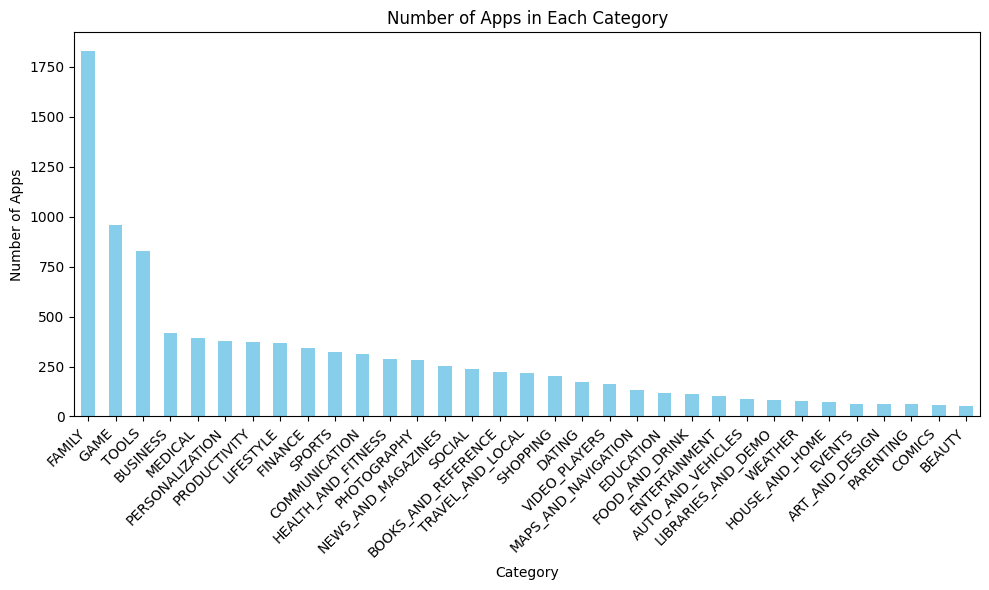

In [ ]:
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
num_apps_in_category.plot(kind='bar', color='skyblue')
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#app ratings

After checking how much of the market each type of app has, let's now look at how well all these apps do on average. The ratings an app gets (rated from 1 to 5) affect how easy it is to find, how many people actually get it, and how people see the company. Ratings are an important way to measure how well an app is doing.

Our research shows that, on average, all types of apps get a rating of 4.17. Most apps have high ratings, with only a few having low ratings, as shown by the histogram plot that leans towards the right.

In [ ]:
# Average rating of apps
avg_app_rating = apps.Rating.mean()
print('Average app rating = ', round(avg_app_rating, 2))

Average app rating =  4.17


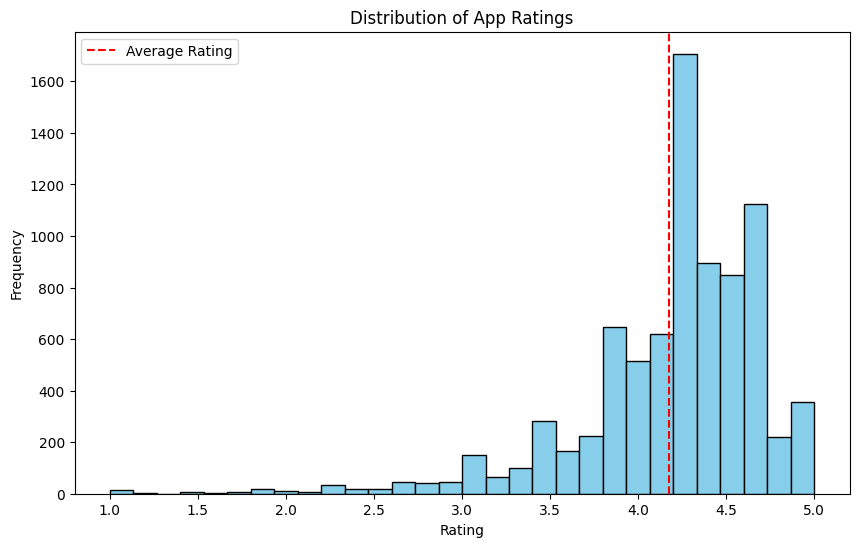

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(apps['Rating'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=avg_app_rating, color='red', linestyle='--', label='Average Rating')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#5. Size and price

Let's talk about app size and price. If your app is too big, it can be hard and costly for users to download. Long download times might make users lose interest before trying your app, and people's devices have limited storage. Some users expect apps to be free or cheap, which is even more important in developing countries with slower internet and lower income.

How can we make smart strategies for sizing and pricing our app?

Does an app's size affect its rating?
Do users prefer light apps over heavy ones?
Does the price of an app affect its rating?
Do users mostly choose free apps over paid ones?
We found that most highly-rated apps (rated over 4) are between 2 MB and 20 MB. Also, the majority of apps are priced under $10.

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
large_categories.Category.nunique()
print(large_categories.Category.nunique(),
      "large categories (out of", apps.Category.nunique(),')')

14 large categories (out of 33 )


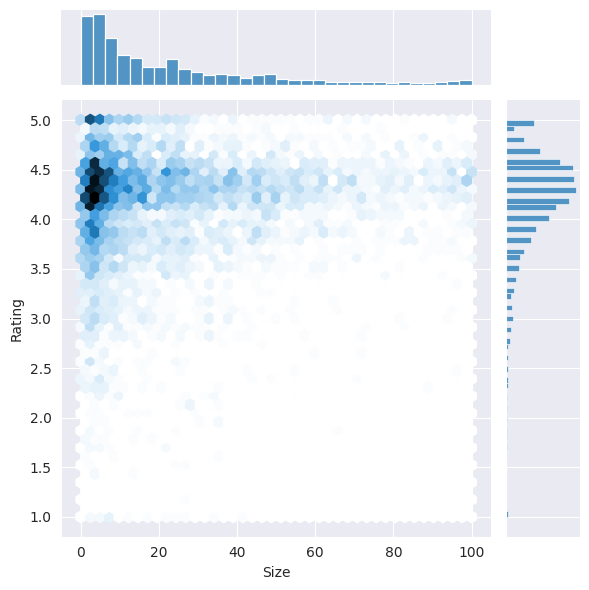

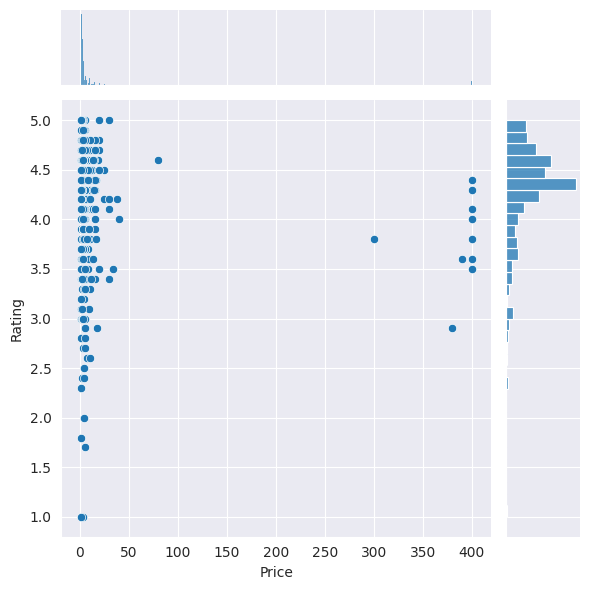

In [ ]:
# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

#6. Relation between app category and app price

Now comes the tough part: How do companies and developers make money? What strategies can they use to maximize profit? The cost of apps depends on features, complexity, and platform.

Choosing the right price for your mobile app involves considering factors like how much customers are willing to pay. A wrong price can turn customers away, either because it seems too high or because the app doesn't meet their expectations.

Different types of apps require different pricing. Simple, everyday apps like calculators are often free. However, specialized apps, like medical ones, may cost more. Medical and Family apps are generally the most expensive, with some medical apps going up to $80. Game apps are usually priced below $20.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


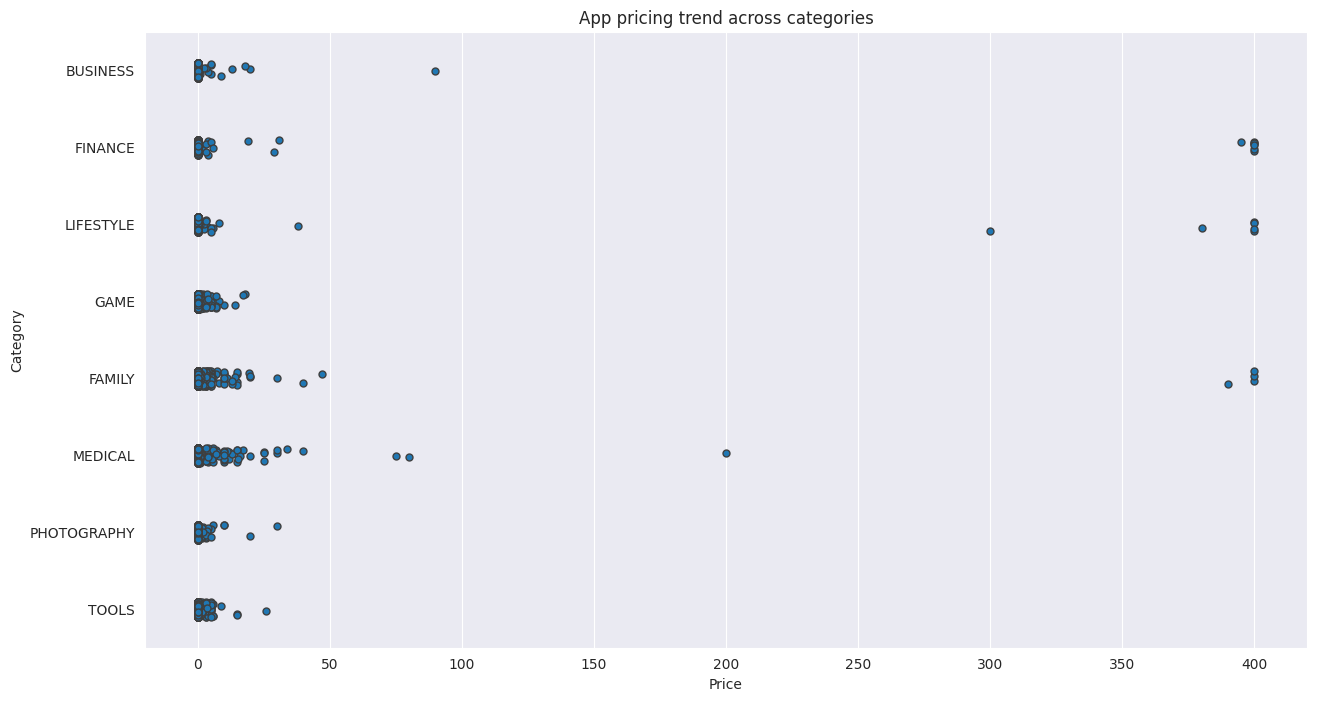

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

#7. Filter out "junk" apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization. The distribution of apps under $20 becomes clearer.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

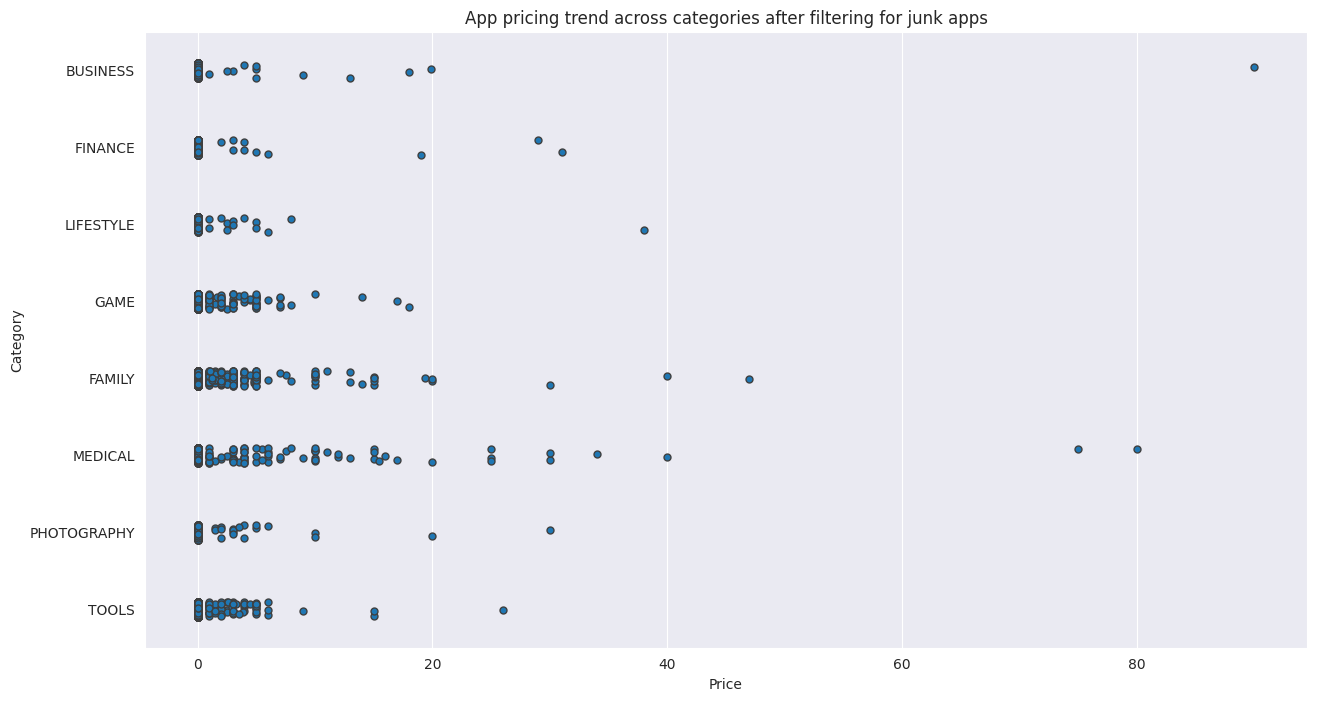

In [ ]:
# Select apps priced below $100
apps_under_100 = popular_app_cats.query('Price < 100')

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')


#8. Popularity of paid apps vs free apps

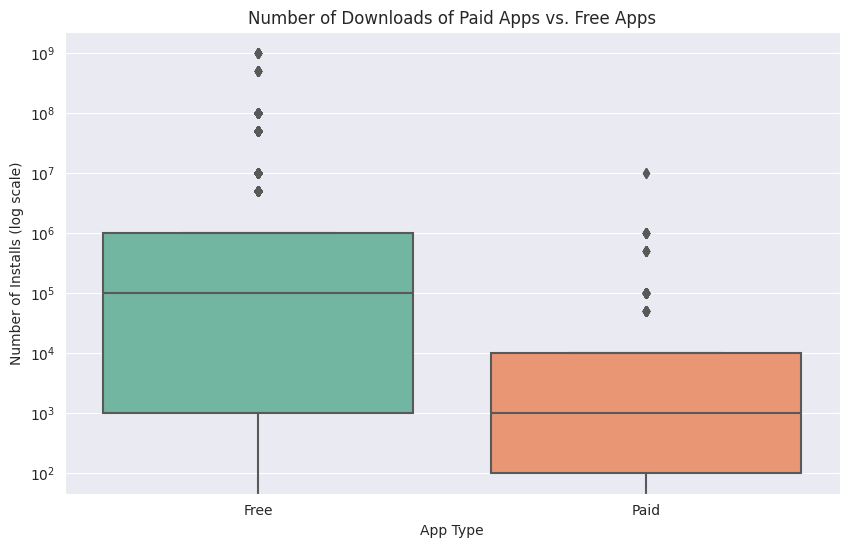

In [ ]:
import seaborn as sns

# Assuming 'apps' is your DataFrame containing the data
paid_apps_installs = apps.loc[apps['Type'] == 'Paid', 'Installs']
free_apps_installs = apps.loc[apps['Type'] == 'Free', 'Installs']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Installs', data=apps, palette='Set2')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('Number of Downloads of Paid Apps vs. Free Apps')
plt.xlabel('App Type')
plt.ylabel('Number of Installs (log scale)')
plt.show()


# 9. Sentiment analysis of user reviews

We can check how people feel about our product or service by analyzing user reviews, a process called sentiment analysis. For apps, positive reviews often use words like 'amazing' and 'friendly,' while negative ones may include 'malware' and 'problem.' Looking at sentiment scores, free apps tend to get more negative comments than paid ones. This suggests that paid apps might generally be of higher quality. Our analysis of over ten thousand Google Play Store apps can help guide decisions if we decide to create our own app.

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv('/content/user_reviews.csv')
reviews_df.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
15888,Block Puzzle,Love game. It annoys little sometimes even I t...,Negative,-0.029167,0.5
4190,Adobe Acrobat Reader,NaN,NaN,NaN,NaN
10587,BBWCupid - BBW Dating App,Well I like free. But upgrade membership inter...,Positive,0.400000,0.8
11165,Babbel – Learn Languages,NaN,NaN,NaN,NaN
5648,"All Football GO- Live Score, Games",All thanks,Positive,0.200000,0.2


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

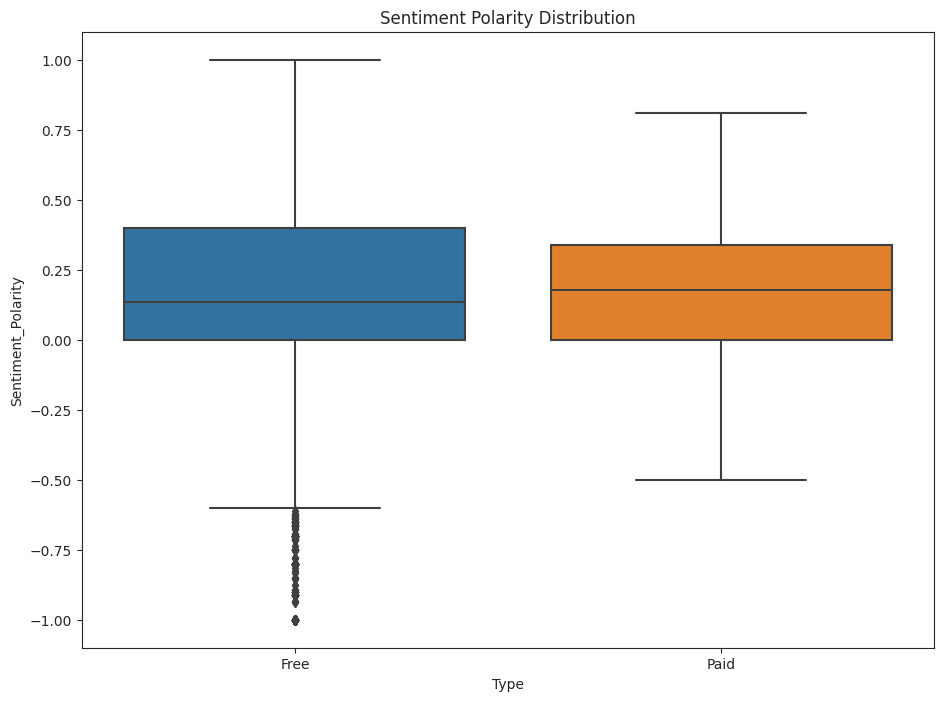

In [ ]:
# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner") # inner == intersection

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')